# Exercice 1 : Un exemple simple

$A \underset{t\rightarrow \infty}{\searrow} 0$

$B \underset{t\rightarrow \infty}{\nearrow\searrow} 0$

$C \underset{t\rightarrow \infty}{\nearrow} A(0)$

$\forall t\in\mathbb{R}_+,\, A(t)+B(t)+C(t)=A(0)+B(0)+C(0)$

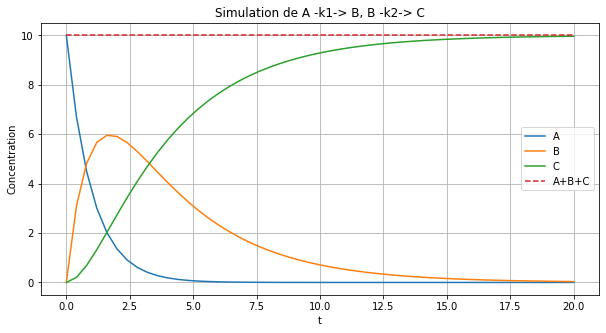

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# On simule les équations 
# A -k1-> B
# B -k2-> C

def f(X, t, k1, k2):
    A, B, C = X[0], X[1], X[2]
    return [-k1*A, 
            k1*A-k2*B,
            k2*B]

t_max = 20
X0 = [10, 0, 0] # conditions initiale A,B,C
N = 50
tvals = np.linspace(0, t_max, N+1)
K = (1, 0.3)

Xvals = odeint(f, X0, tvals, args=K)

plt.figure(figsize=(10,5))
plt.plot(tvals, Xvals, label=["A","B","C"])
plt.plot(tvals, Xvals[:,0]+Xvals[:,1]+Xvals[:,2], '--',label="A+B+C")
plt.title("Simulation de A -k1-> B, B -k2-> C")
plt.xlabel("t")
plt.ylabel("Concentration")
plt.grid()
plt.legend()
#plt.savefig("traceAB.pdf" "")
plt.show()
plt.close()

# Exercice 2 : Dégradation enzymatique

### Q1)

$M=\pmatrix{-1 & 1 & 0\\
            -1 & 1 & 1\\
            1 & -1 & -1\\
            0 & 0 & 1}
 \;\text{ et }\; 
 V(t)=\pmatrix{k_1(ES)(t)\\
               k_{-1}C(t)\\
               k_2C(t)}$
              
------------------
On a donc $\forall t\in\mathbb{R}_+$:

$\begin{align}
    X'(t)&=M\times V(t)\\
    \pmatrix{S(t)\\E(t)\\C(t)\\P(t)}' &=\pmatrix{-1 & 1 & 0\\-1 & 1 & 1\\1 & -1 & -1\\0 & 0 & 1}\times \pmatrix{k_1(ES)(t)\\k_{-1}C(t)\\k_2C(t)}\\
    \pmatrix{S'(t)\\E'(t)\\C'(t)\\P'(t)} &= \pmatrix{-k_1(ES)(t)+k_{-1}C(t)\\-k_1(ES)(t)+k_{-1}C(t)+k_2C(t)\\k_1(ES)(t)-k_{-1}C(t)-k_2C(t)\\k_2C(t)}
\end{align}$

Ce qui nous donne le système suivant :

$\begin{cases} 
S'(t) &=& -k_1(ES)(t)+k_{-1}C(t)\\
E'(t) &=& -k_1(ES)(t)+k_{-1}C(t)+k_2C(t)\\
C'(t) &=& k_1(ES)(t)-k_{-1}C(t)-k_2C(t)\\
P'(t) &=& k_2C(t)
\end{cases}$

----------
### Q2) 

$(E+C)(t)=(E+C)(0)$ (1 enzyme donne 1 complexe qui rend 1 enzyme une fois la réacion finie)

$(S+P-E)(t)=(S+P-E)(0)$

-------
### Q3)

$S \underset{t\rightarrow \infty}{\searrow} 0$

$E\underset{t\rightarrow \infty}{\longrightarrow} E(0)$

$C \underset{t\rightarrow \infty}{\longrightarrow} 0$

$P \underset{t\rightarrow \infty}{\nearrow} S(0)$

--------
### Q4)

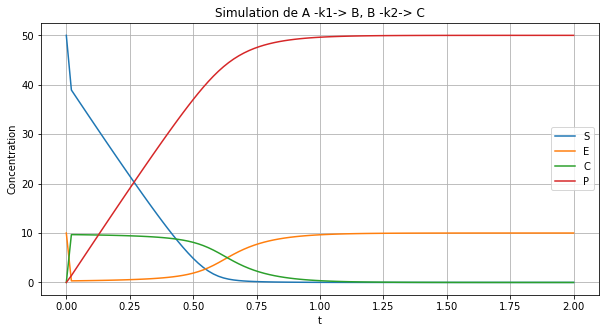

In [5]:
# On simule les équations 
# E+S -k1-> C
# C -k_1-> E+S
# C -k2-> E+P

def f(X, t, k1, k_1, k2):
    S, E, C, P = X[0], X[1], X[2], X[3]
    return [-k1*E*S+k_1*C,
            -k1*E*S+k_1*C+k2*C,
            k1*E*S-k_1*C-k2*C,
            k2*C]

t_max = 2
X0 = [50, 10, 0, 0] # conditions initiale S,E,C,P
N = 100
tvals = np.linspace(0, t_max, N+1)
K = (10, 5, 8)

Xvals = odeint(f, X0, tvals, args=K)

plt.figure(figsize=(10,5))
plt.plot(tvals, Xvals, label=["S","E","C","P"])
plt.title("Simulation de A -k1-> B, B -k2-> C")
plt.xlabel("t")
plt.ylabel("Concentration")
plt.grid()
plt.legend(loc='right')
#plt.savefig("traceAB.pdf" "")
plt.show()
plt.close()

Les courbes coïncident avec les propositions de la question Q3.

-----------
### Q5)

On peut voir que :
- $C$ et $E$ sont symétriques
- $S$ et $P$ sont presque symétriques

# Exercice 3 : Exemple atmosphérique

### Q1) 

On a $M=\pmatrix{-2 & 2 & -1 & 1\\
                 -3 & 3 & 1 & -1\\
                 1 & -1 & 0 & 0\\
                 2 & -2 & -1 & 1\\
                 0 & 0 & 1 & -1}$, 
      donc $^T\!M=\pmatrix{-2 & 2 & 1 & 2 & 0\\
                         2 & 3 & -1 & -2 & 0\\
                         -1 & 1 & 0 & -1 & 1\\
                         1 & -1 & 0 & 1 & -1}$
                         
Cherchons $a=(a_1, a_2, a_3, a_4, a_5)$ tel que $^T\!M^T\!a=0$. Pour cela, utilisons le pivot de Gauss :

$^T\!M=\pmatrix{-2 & 2 & 1 & 2 & 0\\
                 2 & 3 & -1 & -2 & 0\\
                 -1 & 1 & 0 & -1 & 1\\
                 1 & -1 & 0 & 1 & -1}
 \xrightarrow[\matrix{\ell_2\leftarrow\ell_2+\ell_1\\\ell_3\leftarrow2\ell_3-\ell_1\\\ell_4\leftarrow2\ell_4+\ell_1}]{}
 \pmatrix{-2 & 2 & 1 & 2 & 0\\
          0 & 0 & 0 & 0 & 0\\
          0 & 5 & -1 & -4 & 2\\
          0 & -5 & 1 & 4 & -2}
 \xrightarrow[\ell_4\leftarrow\ell_4+\ell_3]{}
 \pmatrix{-2 & 2 & 1 & 2 & 0\\
          0 & 0 & 0 & 0 & 0\\
          0 & 5 & -1 & -4 & 2\\
          0 & 0 & 0 & 0 & 0}$

On a alors le système suivant : $\begin{cases} 
-2a_1-3a_2+a_3+2a_4 &=& 0\\
5a_2-a_3-4a_4+2a_5 &=& 0
\end{cases}$

Les variables non-pivots sont $a_3, a_4, a_5$, nous avons donc 3 cas à étudier :
- $a_3=1, a_4=0, a_5=0$ : $\begin{cases}-2a_1-3a_2+1 &=& 0\\5a_2-1 &=& 0\end{cases}\implies\begin{cases}a_1=1/5\\a_2=1/5\end{cases}$
- $a_3=0, a_4=1, a_5=0$ : $\begin{cases}-2a_1-3a_2+2 &=& 0\\5a_2-4 &=& 0\end{cases}\implies\begin{cases}a_1=-1/5\\a_2=4/5\end{cases}$
- $a_3=0, a_4=0, a_5=1$ : $\begin{cases}-2a_1-3a_2 &=& 0\\5a_2+2 &=& 0\end{cases}\implies\begin{cases}a_1=3/5\\a_2=-2/5\end{cases}$

On a donc les 3 lois de conservations suivantes :
- $A_1+A_2+5A_3 \Longleftrightarrow CO+H_2+5C_2H_2$
- $-A_1+4A_2+5A_4 \Longleftrightarrow -CO+4H_2+5H_2O$
- $3A_1-2A_2+5A_5 \Longleftrightarrow 3CO-2H_2+5CO_2$

-----------
### Q2)


-----------
### Q3)

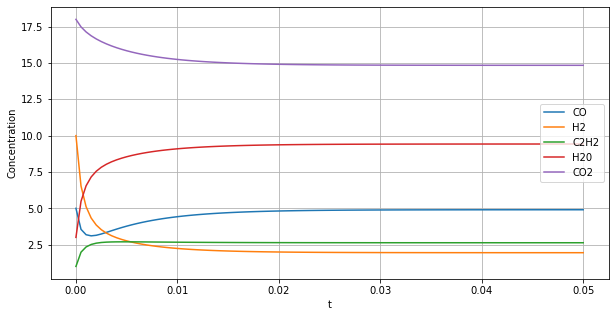

In [3]:
# On simule les équations 
# 2*CO+3*H2 -k1-> C2H2+2*H2O
# C2H2+2*H2O -k2-> 2*CO+3*H2
# CO+H2O -k3-> CO2+H2
# CO2+H2 -k4-> CO+H2O

def f(X, t, k1, k2, k3, k4):
    CO, HH, CCHH, HHO, COO = X[0], X[1], X[2], X[3], X[4]
    return [-2*(k1*CO**2*HH*3)+2*(k2*CCHH*HHO**2)-(k3*CO*HHO)+(k4*COO*HH),
            -3*(k1*CO**2*HH*3)+3*(k2*CCHH*HHO**2)+(k3*CO*HHO)-(k4*COO*HH),
            (k1*CO**2*HH*3)-(k2*CCHH*HHO**2),
            2*(k1*CO**2*HH*3)-2*(k2*CCHH*HHO**2)-(k3*CO*HHO)+(k4*COO*HH),
            (k3*CO*HHO)-(k4*COO*HH)]

t_max = 0.05
X0 = [5, 10, 1, 3, 18] # conditions initiale A,B,C
N = 100
tvals = np.linspace(0, t_max, N+1)
K = (5, 3, 5, 8)

Xvals = odeint(f, X0, tvals, args=K)

plt.figure(figsize=(10,5))
plt.plot(tvals, Xvals, label=["CO","H2","C2H2","H20","CO2"])
plt.xlabel("t")
plt.ylabel("Concentration")
plt.grid()
plt.legend(loc='right')
#plt.savefig("traceAB.pdf" "")
plt.show()
plt.close()

----
### Q4)

Aucune concentration ne tendent vers $0$, toutes les concentrations se stabilisent à l'infini, notre système de réactions est à l'équilibre.

----
### Q5)

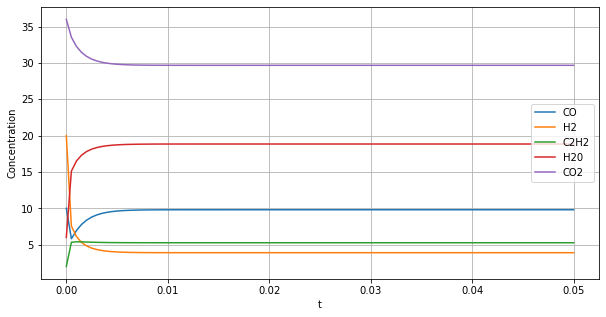

In [4]:
X0 = [2*5, 2*10, 2*1, 2*3,2*18] # conditions initiale A,B,C
K = (2*5, 2*3, 2*5, 2*8)

Xvals = odeint(f, X0, tvals, args=K)

plt.figure(figsize=(10,5))
plt.plot(tvals, Xvals, label=["CO","H2","C2H2","H20", "CO2"])
plt.xlabel("t")
plt.ylabel("Concentration")
plt.grid()
plt.legend(loc='right')
#plt.savefig("traceAB.pdf" "")
plt.show()
plt.close()

Notre système reste à l'équilibre mais toutes les concentrations limites tendent vers double de leurs limites d'avant.